<a href="https://colab.research.google.com/github/hurricane195/Intro-to-Deep-Learning/blob/Homework_1/HW1_P2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please implement the following steps for the housing dataset we overviewed during the lectures.

2.a. Build a multi-perceptron network that regresses the housing price (based on 20%, 80% split). Use the same number of features we did in the lecture without on-hot encoding. Please plot the training and validation results and report final accuracy and model complexity

**2.b. Build a multi-perceptron network that regresses the housing price (based on 20%, 80% split). Use the same number of features we did in the lecture, but this time also add on-hot encoding. Please plot the training and validation results and report the final accuracy and model complexity. Do you see the meaningful changes against 2.a.**

In [ ]:
#Building off Homework 6 Problem 1A submitted for Intro to ML
#Using a modided example of Dr. Tabkhi's "HousingRegression" available at https://github.com/HamedTabkhi/Intro-to-DL/blob/main/housingRegression.py
#Using a modided example of Dr. Tabkhi's "sampleRegression" available at https://github.com/HamedTabkhi/Intro-to-DL/blob/main/sampleRegression.py
#Help from ChatGPT
#Help from Google Colab AI assist with Colab Pro

In [ ]:
from matplotlib import pyplot as plt     # Data Visualisation
import pandas as pd
import numpy as np
import torch
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch.nn as nn
from sklearn.preprocessing import PowerTransformer
from torch.utils.data import DataLoader
from torch.utils import data
from tqdm.notebook import tqdm

from torch.utils.data import TensorDataset, DataLoader

Mounted at /content/drive


In [ ]:
file_path1 = '/content/drive/MyDrive/Colab Notebooks/Datasets/Housing/house-train.csv'
df_train = pd.DataFrame(pd.read_csv(file_path1))
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
file_path2 = '/content/drive/MyDrive/Colab Notebooks/Datasets/Housing/house-test.csv'
df_test = pd.DataFrame(pd.read_csv(file_path2))
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# Check data type
pd.options.display.max_rows=90
df_dtype = pd.DataFrame(df_train.dtypes,columns=['dtype'])
print(df_dtype.value_counts())
#print(df_dtype)

dtype  
object     43
int64      35
float64     3
dtype: int64


In [ ]:
# Features used to modeling
usefull_Y_cols = ['SalePrice',]
GTruth = df_train[usefull_Y_cols].copy()

In [ ]:
GTruth.shape

(1460, 1)

In [ ]:
# Features used to modeling
usefull_cols = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF'
                , 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces'
                ,'LotFrontage','WoodDeckSF','OpenPorchSF'
                ,'ExterQual','Neighborhood','MSZoning'
                ,'Alley','LotShape','LandContour','Condition1','HouseStyle','MasVnrType','SaleCondition',]
df_train_prepro = df_train[usefull_cols].copy()
df_test_prepro = df_test[usefull_cols].copy()

In [ ]:
df_train_prepro.shape

(1460, 21)

In [ ]:
df_test_prepro.shape

(1459, 21)

In [ ]:
# Remove Nulls
## GarageArea in test data
df_test_prepro['GarageArea'] = df_test_prepro['GarageArea'].fillna(df_train_prepro['GarageArea'].mean())
## TotalBsmtSF in test data
df_test_prepro['TotalBsmtSF'] = df_test_prepro['TotalBsmtSF'].fillna(df_train_prepro['TotalBsmtSF'].mean())

In [ ]:
# One-hot encoding
df_train_prepro = pd.get_dummies(df_train_prepro,columns=['Neighborhood','MSZoning','Alley','LotShape','LandContour','Condition1','HouseStyle','MasVnrType','SaleCondition'])
df_test_prepro = pd.get_dummies(df_test_prepro,columns=['Neighborhood','MSZoning','Alley','LotShape','LandContour','Condition1','HouseStyle','MasVnrType','SaleCondition'])
#One-hot encoding: convert categorical data variables into a form that could be provided to machine learning.
#It creates binary (0 or 1) columns for each category in the original data.
#pd.get_dummies(): Tconverts categorical variable(s) into dummy/indicator variables.


In [ ]:
df_train_prepro = df_train_prepro.replace({True: 1, False: 0})
df_test_prepro = df_test_prepro.replace({True: 1, False: 0})

In [ ]:
# Convert all columns to numeric (float) and handle NaN values
df_train_prepro = df_train_prepro.apply(pd.to_numeric, errors='coerce').fillna(0)
df_test_prepro = df_test_prepro.apply(pd.to_numeric, errors='coerce').fillna(0)

In [ ]:
# Save the DataFrame to a CSV file
output_file = '/content/drive/MyDrive/Colab Notebooks/Datasets/Housing/CSV/housing_df_train_prepro.csv'
df_train_prepro.to_csv(output_file, index=False)
print(f'DataFrame saved to {output_file}')

DataFrame saved to /content/drive/MyDrive/Colab Notebooks/Datasets/Housing/CSV/housing_df_train_prepro.csv


In [ ]:
df_train_prepro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OverallQual            1460 non-null   int64  
 1   GrLivArea              1460 non-null   int64  
 2   GarageArea             1460 non-null   int64  
 3   TotalBsmtSF            1460 non-null   int64  
 4   FullBath               1460 non-null   int64  
 5   YearBuilt              1460 non-null   int64  
 6   YearRemodAdd           1460 non-null   int64  
 7   Fireplaces             1460 non-null   int64  
 8   LotFrontage            1460 non-null   float64
 9   WoodDeckSF             1460 non-null   int64  
 10  OpenPorchSF            1460 non-null   int64  
 11  ExterQual              1460 non-null   float64
 12  Neighborhood_Blmngtn   1460 non-null   uint8  
 13  Neighborhood_Blueste   1460 non-null   uint8  
 14  Neighborhood_BrDale    1460 non-null   uint8  
 15  Neig

In [ ]:
#df_test_prepro.info()
#Not using this test set due to omission of ground truths

In [ ]:
GTruth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   SalePrice  1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [ ]:
# Standardize features
scaler = StandardScaler()
df_train_prepro = scaler.fit_transform(df_train_prepro)
df_test_prepro = scaler.fit_transform(df_test_prepro)
GTruth = scaler.fit_transform(GTruth)

In [ ]:
# Split the data into train and validation sets
#x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(df_train_prepro, GTruth, test_size=0.2, random_state=42)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_val = torch.tensor(x_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

In [ ]:
# Create TensorDatasets and DataLoaders for train and validation sets
train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)

test_loader = DataLoader(dataset=df_test_prepro, batch_size=64, shuffle=False)

In [ ]:
#Definition of network model class
class RegressionNet(nn.Module):
    def __init__(self):
        super(RegressionNet, self).__init__()
        self.fc1 = nn.Linear(79, 500)  # 79 input features
        self.fc2 = nn.Linear(500, 20)
        self.fc3 = nn.Linear(20, 1)  # Output layer with 2 units for width and height

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [ ]:
# Define the model and move it to the GPU if available
model = RegressionNet().to(device)

Epoch[1/20], Train Loss: 0.9505, Validation Loss: 1.1653, Validation RMSE: 1.0795
Epoch[2/20], Train Loss: 0.8717, Validation Loss: 1.0909, Validation RMSE: 1.0444
Epoch[3/20], Train Loss: 0.8000, Validation Loss: 1.0166, Validation RMSE: 1.0083
Epoch[4/20], Train Loss: 0.7332, Validation Loss: 0.9396, Validation RMSE: 0.9693
Epoch[5/20], Train Loss: 0.6685, Validation Loss: 0.8620, Validation RMSE: 0.9285
Epoch[6/20], Train Loss: 0.6056, Validation Loss: 0.7822, Validation RMSE: 0.8844
Epoch[7/20], Train Loss: 0.5429, Validation Loss: 0.7053, Validation RMSE: 0.8398
Epoch[8/20], Train Loss: 0.4855, Validation Loss: 0.6319, Validation RMSE: 0.7949
Epoch[9/20], Train Loss: 0.4323, Validation Loss: 0.5633, Validation RMSE: 0.7506
Epoch[10/20], Train Loss: 0.3847, Validation Loss: 0.5024, Validation RMSE: 0.7088
Epoch[11/20], Train Loss: 0.3442, Validation Loss: 0.4498, Validation RMSE: 0.6707
Epoch[12/20], Train Loss: 0.3106, Validation Loss: 0.4067, Validation RMSE: 0.6377
Epoch[13/20],

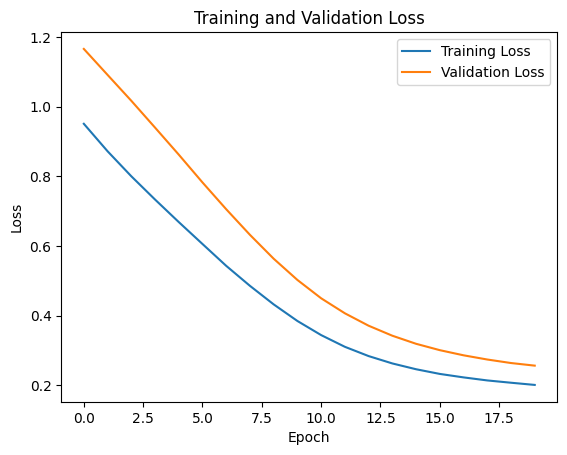

Final Validation RMSE: 0.5065


In [ ]:
# Model, loss function, and optimizer
# Initialize the network
model = RegressionNet()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

train_loss_list = []
val_loss_list = []

num_epochs = 20
for epoch in range(num_epochs):
    # Training phase
    model.train()
    #train_loss = 0.0
    train_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Clear existing gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets)  # Compute loss
        loss.backward()  # Backward pass (compute gradients)
        optimizer.step()  # Update model parameters
        train_loss += loss.item() * inputs.size(0)  # Accumulate the loss

    # Calculate average training loss
    train_loss /= len(train_loader.dataset)
    train_loss_list.append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_total = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, targets)  # Compute loss
            val_loss += loss.item() * inputs.size(0)  # Accumulate the loss
            val_total += ((outputs - targets) ** 2).sum().item()  # Accumulate squared errors

    # Calculate average validation loss (MSE) and RMSE
    val_loss /= len(val_loader.dataset)
    val_loss_list.append(val_loss)
    rmse = np.sqrt(val_total / len(val_loader.dataset))

    # Print training and validation results
    print(f'Epoch[{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation RMSE: {rmse:.4f}')

# Plotting training and validation loss
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Datasets/Housing/Plot')
plt.show()

# Print final RMSE
print(f'Final Validation RMSE: {rmse:.4f}')